# ESTI019-17 - Codificação de Sinais Multimídia

## Roteiro 01 - Captura de Video


### <font color='green'>Prof. Celso Kurashima</font>

### <font color='green'>Prof. Mario Minami</font>

### <font color='blue'><u>04 de outubro de 2019</u></font>



### Identificação do Aluno

#### Nome Completo

#### RA

11075113

## <font color='blue'><u>**Atividades em Aula - Parte 01**</u></font>

1. No seu diretório **"Documentos"**, crie uma pasta com seu primeiro nome e uma sub-pasta **"lab1"**.

2. Dentro desta pasta, copie todos arquivos fornecidos, incluindo os videos e imagens,

3. Entre no **jupyter notebook** e abra o arquivo de programa fornecido em python: **lab1_video_python.ipynb**.

4. Siga as instruções a seguir.

### <font color='red'>1: Compilar e executar um programa OpenCV<font>

* O código abaixo realiza a leitura de um arquivo de **imagem** e mostra numa janela. Estude passo a passo os comandos.

In [12]:
# Definindo variáveis de caminhos de diretórios
path_files = r'D:\Users\thiagoPanini\programming-lessons\html\ufabc-comunicacao-multimidia\githubMesquita_Site\Site\pages\lab_1\assets'
os.chdir(path_files + '\originais')

In [26]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import cv2 as cv
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Lendo a imagem de Lionel Messi
img = cv.imread('messi5.jpg')
cv.imshow('imagem',img)

k = cv.waitKey(0)

# Aperte a tecla ESC para sair e fechar o programa

if k == 27:         
    cv.destroyAllWindows()

* O código abaixo realiza a leitura de um arquivo de imagem e mostra na mesma tela.

* O código obtém a resolução da imagem em pixels, e imprime o valor na tela.

* (OBS.: execute duas vezes o mesmo código, caso a imagem não apareça na primeira vez.)

Resolução:  548  x  342  PIXELS.  3  camadas.


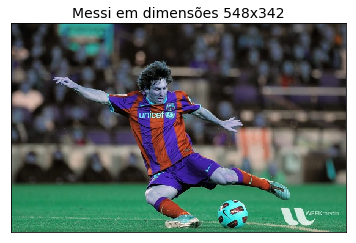

In [14]:
# Lendo a imagem de Lionel Messi e visualizando sua resolução
img_messi = cv.imread('messi5.jpg')
altura, largura, camadas= img_messi.shape
print("Resolução: ", largura, " x ", altura, " PIXELS. ", camadas, " camadas.")

# Plota a imagem em uma figure do matplotlib
plt.imshow(img_messi)
plt.xticks([]), plt.yticks([])
plt.title(f'Messi em dimensões {largura}x{altura}', size=14)
plt.show()

* Agora, passe para o próximo código.

### <font color='red'>2. Leitura de um arquivo de vídeo:</font>

* Esse código realiza a leitura de um vídeo gravado em arquivo e mostra o vídeo em uma nova janela.

* Observe e modifique a taxa de quadros do video no código.

* Observe e modifique a "escala", isto é a resolução da imagem, no código.

Definindo atributos do vídeo a ser lido

In [15]:
# Verificando arquivos neste diretório
print(f'Arquivos no diretório: {os.listdir()}')

Arquivos no diretório: ['alt_big_buck_bunny.mp4', 'big_buck_bunny.mp4', 'messi5.jpg', 'videoCC.mp4']


Através da definição dos parâmetros abaixo, é possível modificar as dimensões do vídeo em escala e taxa pré-definidas.

In [8]:
# QPS = Taxa do vídeo
qps = 25

# Escala da resolução do vídeo
escala = 1

# Lendo vídeo e armazenando em uma variável
cap = cv.VideoCapture('big_buck_bunny.mp4')

# Inicia a marcação de tempo
start_time = time.time()

while(cap.isOpened()):
    # Leitura da imagem no vídeo
    ret, imagem = cap.read()
    
    if ret==True:
        # redimensiona a imagem multimplicando a largura e altura pela Escala
        img_nova = cv.resize(imagem, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        
        # obtenção da resolução das imagens original e redimensionada
        altura, largura, camadas = imagem.shape
        alt, larg, cam = img_nova.shape
        
        # mostra a imagem redimensionada na janela
        cv.imshow('VIDEO',img_nova)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1/qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# Fim da marcação do tempo decorrido e cálculo da diferença
elapsed_time= time.time() - start_time

# Libera o objeto de leitura e fecha a janela
cap.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento da imagem
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  640  x  360  PIXELS. 
Resolução modificada:  16000  x  9000  PIXELS. 
Tempo total: 801.66 segundos.


### <font color='red'>3. Gravação de video em arquivo:</font>

* Esse código realiza a leitura de imagens, mostra a sequência na janela, e salva essa sequência num arquivo no formato **mp4** de video.

In [17]:
# Digite a largura e altura do video
LARG= 640
ALT= 360
# Digite a escala desejada
ESCALA = 0.25

# Calculo da nova resolução da imagem
width= round(LARG * ESCALA)
height= round(ALT * ESCALA)
# QPS = taxa do video. Digite o valor
QPS =  25.0

# Indique o arquivo de video a ser lido
cap = cv.VideoCapture('big_buck_bunny.mp4')

# ------------------------------------------------------------ #
# Estes comandos definem o codec e cria o objeto de gravar video
# Indique o arquivo mp4 a ser criado
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('alt_big_buck_bunny.mp4',fourcc, QPS, (width,height))
# ----------------------------------------------------------- #

start_time = time.time()

while(True):
    # leitura da imagem
    ret, frame = cap.read()
    
    if ret==True:
        # redimensiona a imagem multimplicando a largura e altura pela Escala
        frame2 = cv.resize(frame,None,fx=ESCALA, fy=ESCALA, interpolation = cv.INTER_CUBIC)
        
        # salva a imagem modificada
        out.write(frame2)
        
        # obtenção da resolução das imagens original e redimensionada
        altura, largura, camadas = frame.shape
        alt, larg, cam = frame2.shape
        
        # mostra a imagem redimensionada na janela
        cv.imshow('VIDEO redimensionado', frame2)        

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    
    else:
        break

# Fim da marcação do tempo decorrido e cálculo da diferença
elapsed_time= time.time() - start_time
        
# libera os objetos e fecha a janela
cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento da imagem
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  640  x  360  PIXELS. 
Resolução modificada:  160  x  90  PIXELS. 
Tempo total: 12.52 segundos.


## <font color='blue'><u>**Atividades em Aula - Parte 02**</u></font>

### <font color='red'>1. Obtenção de videos:</font>

(a) Obtenha dois videos de você mesmo, com fundo claro e boa iluminação, com aprox. 10 (dez) segundos de duração cada.

a.1. O primeiro video com movimentos em geral.

a.2. O segundo video com movimentos mais rápidos que o primeiro.

(b) Salve os videos na mesma pasta dos demais arquivos deste roteiro.



### <font color='red'>2. Modificação dos videos:</font>

(c) Elaborar um novo programa, re-utilizando os codigos estudados na **Parte 01**, com os seguintes objetivos:


c.1. Executar o primeiro video na resolução original e na taxa original.

c.2. Executar o segundo video numa resolução maior e noutra resolução menor que a original.

c.3. Executar o primeiro video numa taxa de quadros maior e noutra taxa de quadros menos que a taxa original.

c.4. Salvar o segundo video com resolução menor que a original e com taxa de quadros maior que a taxa original.

(d) Anotar os resultados obtidos de todos os parametros para todos casos acima (taxa de quadros, resolução, tempo de execução).


#### c.1

In [58]:
# Modificando diretório onde encontram-se os arquivos do Lab 01
os.chdir(path_files)

# Criando DataFrame para armazenar resultados
df_videos = pd.DataFrame({})
cols = ['video', 'tipo_analise', 'qps', 'escala', 'altura', 'largura', 'tempo_decorrido']
for col in cols:
    df_videos[col] = ''

In [59]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video01_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_01 = cap.read()
    
    if ret==True:
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_01.shape
        
        # mostra a imagem na janela
        cv.imshow('video01', video_01)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Tempo total: 21.62 segundos.


In [60]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 01',
    'tipo_analise': 'Vídeo Original',
    'qps': qps,
    'escala': escala,
    'altura': altura,
    'largura': largura,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)

#### c.2 - Resolução menor

In [93]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 0.25

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video01_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_01_escala_menor.mp4', fourcc, qps, (width, height))

while(True):
    
    # leitura da imagem no video
    ret, video_01 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_01.shape
        
        # Redimensionando vídeo
        video_01_alt = cv.resize(video_01, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_01_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_01_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video01', video_01_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  480  x  270  PIXELS. 
Tempo total: 27.54 segundos.


In [62]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 01',
    'tipo_analise': 'Resolução Menor',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)

In [63]:
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422


#### c.2 - Resolução maior

In [94]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 1.5

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video01_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_01_escala_maior.mp4', fourcc, qps, (width, height))

while(True):
    
    # leitura da imagem no video
    ret, video_01 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_01.shape
        
        # Redimensionando vídeo
        video_01_alt = cv.resize(video_01, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_01_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_01_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video01', video_01_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  2880  x  1620  PIXELS. 
Tempo total: 46.29 segundos.


In [65]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 01',
    'tipo_analise': 'Resolução Maior',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860


#### c.3 - Taxa maior

In [95]:
# QPS = Definindo taxa do vídeo
qps = 400

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video01_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_01_taxa_maior.mp4', fourcc, qps, (width, height))

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_01 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_01.shape
        
        # Redimensionando vídeo
        video_01_alt = cv.resize(video_01, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_01_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_01_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video01', video_01_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Tempo total: 18.58 segundos.


In [67]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 01',
    'tipo_analise': 'Taxa Maior',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831


#### c.3 - Taxa menor

In [96]:
# QPS = Definindo taxa do vídeo
qps = 10

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video01_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_01_taxa_menor.mp4', fourcc, qps, (width, height))

while(True):
    
    # leitura da imagem no video
    ret, video_01 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_01.shape
        
        # Redimensionando vídeo
        video_01_alt = cv.resize(video_01, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_01_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_01_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video01', video_01_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Tempo total: 53.44 segundos.


In [69]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 01',
    'tipo_analise': 'Taxa Menor',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031


## Repetindo Procedimentos para Vídeo 02

In [71]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Tempo total: 19.36 segundos.


In [72]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 02',
    'tipo_analise': 'Vídeo Original',
    'qps': qps,
    'escala': escala,
    'altura': altura,
    'largura': largura,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)

In [73]:
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031
5,Vídeo 02,Vídeo Original,25,1,1080,1920,19.361755


#### c.2 - Resolução menor

In [97]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 0.25

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_02_escala_menor.mp4', fourcc, qps, (width, height))

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # Redimensionando vídeo
        video_02_alt = cv.resize(video_02, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_02_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_02_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  480  x  270  PIXELS. 
Tempo total: 19.27 segundos.


In [75]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 02',
    'tipo_analise': 'Resolução Menor',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031
5,Vídeo 02,Vídeo Original,25,1,1080,1920,19.361755
6,Vídeo 02,Resolução Menor,25,0.25,270,480,25.953965


#### c.2 - Resolução maior

In [98]:
# QPS = Definindo taxa do vídeo
qps = 25

# Escala da resolução do video
escala = 1.5

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_02_escala_maior.mp4', fourcc, qps, (width, height))
        
while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # Redimensionando vídeo
        video_02_alt = cv.resize(video_02, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_02_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_02_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  2880  x  1620  PIXELS. 
Tempo total: 43.11 segundos.


In [79]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 02',
    'tipo_analise': 'Resolução Maior',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031
5,Vídeo 02,Vídeo Original,25,1,1080,1920,19.361755
6,Vídeo 02,Resolução Menor,25,0.25,270,480,25.953965
7,Vídeo 02,Resolução Maior,25,1.5,1620,2880,29.086796


#### c.3 - Taxa maior

In [99]:
# QPS = Definindo taxa do vídeo
qps = 400

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_02_taxa_maior.mp4', fourcc, qps, (width, height))

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # Redimensionando vídeo
        video_02_alt = cv.resize(video_02, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_02_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_02_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  1920  x  1080  PIXELS. 
Tempo total: 18.44 segundos.


In [81]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 02',
    'tipo_analise': 'Taxa Maior',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031
5,Vídeo 02,Vídeo Original,25,1,1080,1920,19.361755
6,Vídeo 02,Resolução Menor,25,0.25,270,480,25.953965
7,Vídeo 02,Resolução Maior,25,1.5,1620,2880,29.086796
8,Vídeo 02,Taxa Maior,400,1,1080,1920,11.235769


#### c.3 - Taxa menor

In [100]:
# QPS = Definindo taxa do vídeo
qps = 10

# Escala da resolução do video
escala = 1

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_02_taxa_menor.mp4', fourcc, qps, (width, height))

while(cap.isOpened()):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # Redimensionando vídeo
        video_02_alt = cv.resize(video_02, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        out.write(video_02_alt)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_02_alt.shape
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  1920  x  1080  PIXELS. 
Tempo total: 46.72 segundos.


In [83]:
# Salvando dados
dict_data = {
    'video': 'Vídeo 02',
    'tipo_analise': 'Taxa Menor',
    'qps': qps,
    'escala': escala,
    'altura': alt,
    'largura': larg,
    'tempo_decorrido': elapsed_time
}

df_videos = df_videos.append(dict_data, ignore_index=True)
df_videos

,video,tipo_analise,qps,escala,altura,largura,tempo_decorrido
0,Vídeo 01,Vídeo Original,25,1,1080,1920,21.615206
1,Vídeo 01,Resolução Menor,25,0.25,270,480,28.816422
2,Vídeo 01,Resolução Maior,25,1.5,1620,2880,33.994860
3,Vídeo 01,Taxa Maior,400,1,1080,1920,13.750831
4,Vídeo 01,Taxa Menor,10,1,1080,1920,54.096031
5,Vídeo 02,Vídeo Original,25,1,1080,1920,19.361755
6,Vídeo 02,Resolução Menor,25,0.25,270,480,25.953965
7,Vídeo 02,Resolução Maior,25,1.5,1620,2880,29.086796
8,Vídeo 02,Taxa Maior,400,1,1080,1920,11.235769
9,Vídeo 02,Taxa Menor,10,1,1080,1920,46.267434


In [84]:
# Extraindo dados
df_videos.to_csv('analise_dados_videos.csv', sep=';', index=False)

#### c.4 - Taxa maior, resolução menor e salvando novo vídeo

In [88]:
# QPS = Definindo taxa do vídeo
qps = 60

# Escala da resolução do video
escala = 0.25

# Objeto que indica o arquivo de video a ser lido
cap = cv.VideoCapture('video02_lab01.mp4')

# Inicia a marcação de tempo
start_time = time.time()

# Salva vídeo redimensionado
width = round(largura * escala)
height = round(altura * escala)
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('video_02_taxa_maior_res_menor.mp4', fourcc, qps, (width, height))

while(True):
    
    # leitura da imagem no video
    ret, video_02 = cap.read()
    
    if ret==True:
          
        # obtenção da resolução das imagens original
        altura, largura, camadas = video_02.shape
        
        # Redimensionando vídeo
        video_02_alt = cv.resize(video_02, None, fx=escala, fy=escala, interpolation=cv.INTER_CUBIC)
        
        # obtenção da resolução das imagens redimensionadas
        alt, larg, cam = video_02_alt.shape
        
        out.write(video_02_alt)
        
        # mostra a imagem na janela
        cv.imshow('video02', video_02_alt)
    
        # Temporização: aguarda o proximo quadro durante (1/QPS) segundos
        # exemplo: se QPS= 25 fps, tempo de espera = 40 ms
        time.sleep(1 / qps)
    
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Tempo decorrido
elapsed_time = time.time() - start_time

cap.release()
out.release()
cv.destroyAllWindows()

# resolução original
print("Resolução  original: ", largura, " x ", altura, " PIXELS. ")

# resolução após redimensionalmento do vídeo
print("Resolução modificada: ", larg, " x ", alt, " PIXELS. ")

# Tempo decorrido na exibição do video
print("Tempo total: %.2f segundos." % elapsed_time)

Resolução  original:  1920  x  1080  PIXELS. 
Resolução modificada:  480  x  270  PIXELS. 
Tempo total: 14.98 segundos.


### <font color='red'>3. Elaborar o relatório das atividades práticas, no formato HTML5:</font>

(e) Descreva todos os procedimentos realizados.

(f) Disponibilize o código elaborado na forma de arquivo **.ipynb**, e coloque o "link" para o mesmo no relatório html5.

(g) Insira os videos salvos no item (d), na forma multimídia do relatório html5.

(h) Envie os arquivos na pasta disponibilizada.



### Referências
MINICHINO, J., HOWSE, J.. Learning OpenCV 3 Computer Vision with Python, 2nd Edition, Packt Publishing, 2015.

Tutorial: OpenCV-Python Tutorials https://docs.opencv.org/3.4.1/d6/d00/tutorial_py_root.html

Tutorial: Getting Started with Images https://docs.opencv.org/3.4.1/dc/d2e/tutorial_py_image_display.html

* Insira novas referencia, caso tenha utilizado.